<big>**<center>Project 2<br> Pavlos Logdanidis 2071 ,  Vasilopoulos Vasileios 2024<center>**<big>

## Project 2 - Using optimization routines from `scipy` and `statsmodels`
====

In [224]:
import scipy.linalg as la
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Finding roots
----

For root finding, we generally need to provide a starting point in the vicinity of the root. For 1D functions root finding, this is often provided as a bracket (a, b) where a and b have opposite signs.

\begin{exercise}
Apply the following methods to find the root of the functions c) and d) from the exercise 2 chapt 10 page 212 Houstis' book
\end{exercise}


### Univariate roots and fixed points

In [2]:
def f(x):
    return x**3-3*x+1

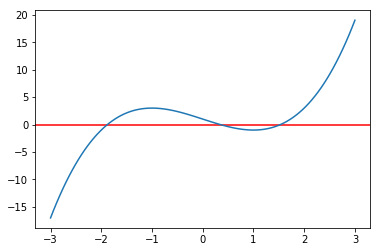

In [3]:
x = np.linspace(-3,3,100)
plt.axhline(0, c='red')
plt.plot(x, f(x))

In [3]:
from scipy.optimize import brentq, newton

#### `brentq` is the recommended method

In [5]:
brentq(f, -3, 0), brentq(f, 0, 1), brentq(f, 1,3)

(-1.8793852415718166, 0.3472963553337031, 1.532088886237956)

#### Newton-Raphson method

In [6]:
newton(f, -3), newton(f, 0), newton(f, 3)

(-1.8793852415718169, 0.34729635533385395, 1.5320888862379578)

In [7]:
fprime = lambda x: 3*x**2 - 3
newton(f, -3, fprime), newton(f, 0, fprime), newton(f, 3, fprime)

(-1.8793852415718166, 0.34729635533386066, 1.532088886237956)

#### Analytical solution using `sympy` to find roots of a polynomial

In [1]:
from sympy import symbols, N, real_roots

In [2]:
x = symbols('x', real=True)
sol = real_roots(x**3 - 3*x + 1)
list(map(N, sol))

[-1.87938524157182, 0.347296355333861, 1.53208888623796]

#### Finding fixed points

Finding the fixed points of a function $g(x) = x$ is the same as finding the roots of $g(x) - x$. However, specialized algorihtms also exist - e.g. using `scipy.optimize.fixedpoint`.

In [10]:
from scipy.optimize import fixed_point

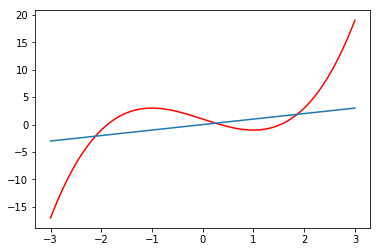

In [11]:
x = np.linspace(-3,3,100)
plt.plot(x, f(x), color='red')
plt.plot(x, x)
plt.show()

In [12]:
fixed_point(f, 0), fixed_point(f, -3), fixed_point(f, 3)

(array(0.25410169), array(-2.11490754), array(1.86080585))

In [13]:
newton(lambda x: f(x) - x, 0), newton(lambda x: f(x) - x, -3), newton(lambda x: f(x) - x, 3)

(0.2541016883650524, -2.114907541476814, 1.8608058531117062)

In [24]:
def f(x, r):
    """Discrete logistic equation."""
    return r*x*(1-x)

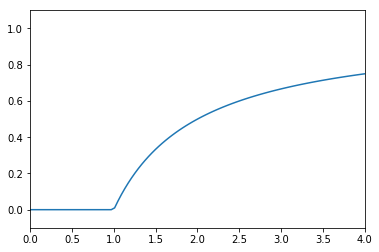

In [25]:
n = 100
fps = np.zeros(n)
for i, r in enumerate(np.linspace(0, 4, n)):
    fps[i] = fixed_point(f, 0.5, args=(r, ))

plt.plot(np.linspace(0, 4, n), fps)
plt.axis([0,4,-0.1, 1.1])
pass

#### Note that we don't know anything about the **stability** of the fixed point

Beyond $r = 3$, the fixed point is unstable, even chaotic, but we would never know that just from the plot above.

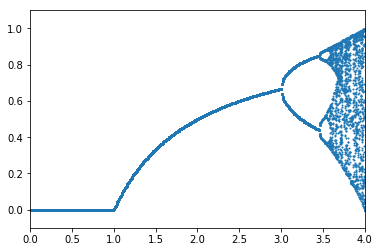

In [26]:
xs = []
for i, r in enumerate(np.linspace(0, 4, 400)):
    x = 0.5
    for j in range(10000):
        x = f(x, r)
    for j in range(50):
        x = f(x, r)
        xs.append((r, x))
xs = np.array(xs)
plt.scatter(xs[:,0], xs[:,1], s=1)
plt.axis([0,4,-0.1, 1.1])
plt.show()

### Mutlivariate roots and fixed points

Use `root` to solve polynomial equations. Use `fsolve` for non-polynomial equations.

**c)** f(x)=x.^3-3*x.^2+5 στο διάστημα [-4 4]για x0=-3:.1:3.
Η σύγκλιση γίνεται πάντα με ομαλό τρόπο; Ποιο είναι το πρόβλημα με
το σημείο x0=1? 

In [32]:
def f(x):
    return x**3-3*x**2 +5

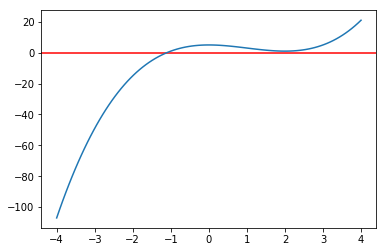

In [33]:
x = np.linspace(-4,4,100)
plt.axhline(0, c='red')
plt.plot(x, f(x))

In [34]:
brentq(f,-2,1),newton(f,-3) , newton(f,3)

(-1.1038034027357337, -1.1038034027355366, -1.103803402735531)

In [35]:
newton(f,1)

RuntimeError: Failed to converge after 50 iterations, value is 1.5926898815500994

For this starting point, newton fails to converge because the derivate is negative and we move towards the right side where there is a local minimum.

In [36]:
fprime = lambda x:3*x**2-6*x
newton(f,-3,fprime) ,newton(f,3,fprime)

(-1.1038034027355366, -1.1038034027355366)

In [37]:
from sympy import symbols, N, real_roots

x = symbols('x', real=True)
sol = real_roots(x**3-3*x**2 +5)
list(map(N, sol))


[-1.10380340273554]

**d**) f(x)=sign(x-2).*sqrt(abs(x-2)) στο διάστημα [0 4] με
x0=1. Η μέθοδος Newton συγκλίνει; αποκλίνει; Γιατί;

In [38]:
def f(x):
    return np.sign(x-2)*np.sqrt(abs(x-2))

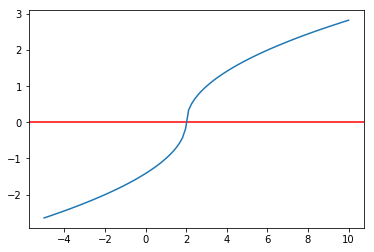

In [39]:
x = np.linspace(-5,10,100)
plt.axhline(0, c='red')
plt.plot(x, f(x))

In [40]:
newton(f,1),brentq(f,1,3)

(2.0000000018371846, 2.0)

Newton converges because the function is well behaved near the root.It's convex for x<2 ( which is the root) and concave for x>2.


\begin{exercise}

Apply fsolve to find the roots of systems a) and b) from exercise 6 chapt 10 page 213
\end{exercise}



In [229]:
from scipy.optimize import root, fsolve

Suppose we want to solve a system of $m$ equations with $n$ unknowns

\begin{align}
f(x_0, x_1) &= x_1 - 3x_0(x_0+1)(x_0-1) \\
g(x_0, x_1) &= 0.25 x_0^2 + x_1^2 - 1
\end{align}

In [230]:
def f(x):
    return [x[1] - 3*x[0]*(x[0]+1)*(x[0]-1),
            .25*x[0]**2 + x[1]**2 - 1]

In [29]:
sol = root(f, (0.5, 0.5))
sol.x

array([1.11694147, 0.82952422])

In [30]:
fsolve(f, (0.5, 0.5))

array([1.11694147, 0.82952422])

#### We can also give the jacobian

In [31]:
def jac(x):
    return [[-6*x[0], 1], [0.5*x[0], 2*x[1]]]

In [32]:
sol = root(f, (0.5, 0.5), jac=jac)
sol.x, sol.fun

(array([1.11694147, 0.82952422]), array([-4.23383550e-12, -3.31612515e-12]))

#### Check that values found are really roots

In [33]:
np.allclose(f(sol.x), 0)

True

#### Starting from other initial conditions, different roots may be found

In [34]:
sol = root(f, (12,12))
sol.x

array([ 0.77801314, -0.92123498])

In [35]:
np.allclose(f(sol.x), 0)

True

a)  
  $ x1 + x2( x2 (5-x2) -2) = 13 $  
  $ x1 +x2( x2 (1+x2)-14 )=29 ,x0=[15,-2]$

In [41]:
from scipy.optimize import root, fsolve

def f(x):
    return [x[0]+x[1]*(x[1]*(5-x[1])-2)-13,
           x[0] + x[1]*(x[1]*(1 + x[1])-14)-29]

sols=fsolve(f,(15,-2))

C:\Users\Paul\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [42]:
np.allclose(f((sols[0],sols[1])), 0)

False

Using fsolve() and with different starting point

In [43]:
fsolve(f,(15,3))

array([5., 4.])

In [44]:
np.allclose(f((5,4)), 0)

True

This happens because fsolve is a wrapper around MINPACK’s hybrd and hybrj algorithms.From the HYBRD documentation:  
*"HYBRD searches for a zero of the system
         by minimizing the sum of the squares of the functions.  In so
         doing, it can become trapped in a region where the minimum
         does not correspond to a zero of the system and, in this situation, the iteration eventually fails to make good progress.
         In particular, this will happen if the system does not have a
         zero.  If the system has a zero, rerunning HYBRD from a different starting point may be helpful."*      
         Using a different starting point we got a solution and checked if it actually solves the system using numpy's allclose() function.

b)  
$x1^2 + x2^2 +x3^2 = 5  $  
$x1 + x2 = 1  $  
$x1 + x3 = 3 ,x0 = [(1+sqrt(3))/2,(1-sqrt(3))/2,sqrt(3)]$

In [45]:
def f(x):
    return [x[0]**2 + x[1]**2 +x[2]**2 -5 ,x[0]+ x[1] -1,x[0] + x[2] -3]

In [46]:
sols = fsolve(f,((1+np.sqrt(3))/2,(1-np.sqrt(3))/2,np.sqrt(3)))

In [47]:
np.allclose(f((sols[0],sols[1],sols[2])), 0)

True

This time it seems our starting point is good enough and we get a confirmed solution.

Optimization Primer
----

We will assume that our optimization problem is to minimize some univariate or multivariate function $f(x)$. This is without loss of generality, since to find the maximum, we can simply minime $-f(x)$. We will also assume that we are dealing with multivariate or real-valued smooth functions - non-smooth or discrete functions (e.g. integer-valued) are outside the scope of this course.

To find the minimum of a function, we first need to be able to express the function as a mathematical expression. For example, in least squares regression, the function that we are optimizing is of the form $y_i - f(x_i, \theta)$ for some parameter(s) $\theta$. To choose an appropriate optimization algorithm, we should at least answer these two questions if possible:

1. Is the function convex?
2. Are there any constraints that the solution must meet?

Finally, we need to realize that optimization methods are nearly always designed to find local optima. For convex problems, there is only one minimum and so this is not a problem. However, if there are multiple local minima, often heuristics such as multiple random starts must be adopted to find a "good" enough solution. 

### Is the function convex?

Convex functions are very nice because they have a **single global minimum**, and there are very efficient algorithms for solving large convex systems. 

Intuitively, a function is convex if every chord joining two points on the function lies above the function. More formally, a function is convex if 
$$
f(ta + (1-t)b) \lt tf(a) + (1-t)f(b)
$$ 
for some $t$ between 0 and 1 - this is shown in the figure below.

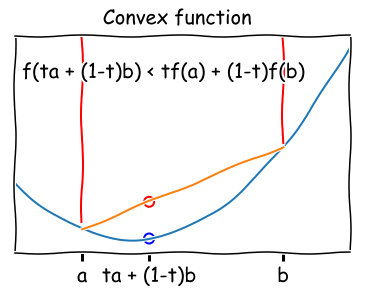

In [12]:
def f(x):
    return (x-4)**2 + x + 1

with plt.xkcd():
    x = np.linspace(0, 10, 100)

    plt.plot(x, f(x))
    ymin, ymax = plt.ylim()
    plt.axvline(2, ymin, f(2)/ymax, c='red')
    plt.axvline(8, ymin, f(8)/ymax, c='red')
    plt.scatter([4, 4], [f(4), f(2) + ((4-2)/(8-2.))*(f(8)-f(2))], 
                 edgecolor=['blue', 'red'], facecolor='none', s=100, linewidth=2)
    plt.plot([2,8], [f(2), f(8)])
    plt.xticks([2,4,8], ('a', 'ta + (1-t)b', 'b'), fontsize=20)
    plt.text(0.2, 40, 'f(ta + (1-t)b) < tf(a) + (1-t)f(b)', fontsize=20)
    plt.xlim([0,10])
    plt.yticks([])
    plt.suptitle('Convex function', fontsize=20)
    plt.show()

#### Warm up exercise

\begin{exercise}
Show that $f(x)  = -\log(x)$ is a convex function.
\end{exercise}




In [48]:
def f(x):
    return -np.log(x)

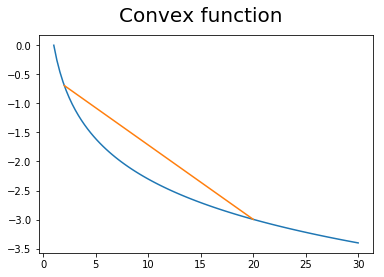

In [49]:
x = np.linspace(1, 30, 100)
plt.plot(x, f(x))
plt.plot([2,20],[f(2),f(20)])
plt.suptitle('Convex function', fontsize=20)
plt.show()


In [51]:
from sympy import symbols, hessian, Function, init_printing, expand, Matrix, diff
import sympy as sp
x = symbols('x')
f = symbols('f', cls=Function)
f= -sp.log(x)
diff(f,x,2)

x**(-2)

The 2nd derivative is $1/x^2$ which is always positive.Another proof that $-log(x)$ is convex.

#### Checking if a function is convex using the Hessian
\begin{remark}
The formal definition is only useful for checking if a function is convex if you can find a counter-example to demonstrate it. More practically, a twice differentiable function is convex if its Hessian is positive semi-definite, and strictly convex if the Hessian is positive definite.
\end{remark}



For example, suppose we want to minimize the scalar-valued function

$$
f(x_1, x_2, x_3) = x_1^2 + 2x_2^2 + 3x_3^2 + 2x_1x_2 + 2x_1x_3
$$

In [7]:
from sympy import symbols, hessian, Function, init_printing, expand, Matrix, diff
x, y, z = symbols('x y z')
f = symbols('f', cls=Function)
init_printing()

In [3]:
f = x**2 + 2*y**2 + 3*z**2 + 2*x*y + 2*x*z
f

In [4]:
H = hessian(f, (x, y, z))
H

⎡2  2  2⎤
⎢       ⎥
⎢2  4  0⎥
⎢       ⎥
⎣2  0  6⎦

In [7]:
np.real_if_close(la.eigvals(np.array(H).astype('float')))

array([0.24122952, 7.06417777, 4.69459271])

Since the matrix is symmetric and all eigenvalues are positive, the Hessian is positive definite and the function is strictly convex.

\begin{exercise}

Check the convexity of the function $(x-y)/(x^2+y^2+1)$ and explain your findings

\end{exercise}

In [15]:
from sympy.solvers import solve
x, y = symbols('x y')
f = symbols('f', cls=Function)
init_printing()

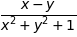

In [17]:
f = (x-y)/(x**2 + y**2 +1)
f

In [18]:
H = hessian(f, (x, y))
H

⎡    2                                                                        
⎢ 8⋅x ⋅(x - y)         4⋅x           2⋅(x - y)     8⋅x⋅y⋅(x - y)         2⋅x  
⎢────────────── - ────────────── - ──────────────  ────────────── + ──────────
⎢             3                2                2               3             
⎢⎛ 2    2    ⎞    ⎛ 2    2    ⎞    ⎛ 2    2    ⎞   ⎛ 2    2    ⎞    ⎛ 2    2  
⎢⎝x  + y  + 1⎠    ⎝x  + y  + 1⎠    ⎝x  + y  + 1⎠   ⎝x  + y  + 1⎠    ⎝x  + y  +
⎢                                                                             
⎢                                                      2                      
⎢8⋅x⋅y⋅(x - y)         2⋅x              2⋅y         8⋅y ⋅(x - y)         4⋅y  
⎢────────────── + ────────────── - ──────────────  ────────────── + ──────────
⎢             3                2                2               3             
⎢⎛ 2    2    ⎞    ⎛ 2    2    ⎞    ⎛ 2    2    ⎞   ⎛ 2    2    ⎞    ⎛ 2    2  
⎣⎝x  + y  + 1⎠    ⎝x  + y  + 1⎠    ⎝x  + y  + 1⎠   ⎝

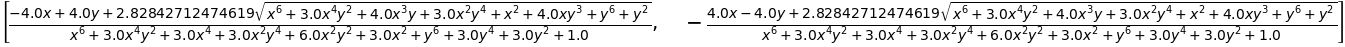

In [21]:
l=symbols('l')#lambda
I=Matrix(np.eye(2))
#(H-λ*I).det()=0 solve for λ 
eigenvalues=solve((H-l*I).det(),l)
eigenvalues

As we can see,the eigenvalues of the Hessian are not real numbers but functions of x and y.In order to check the convexity of the function ,we need to see the behaviour of the two eigenvalues in terms of their sign as we change x and y.This is a very difficult problem to solve analytically but we can get a pretty good idea of what's going on if we plot the two eigenvalues as functions of x and y.

In [22]:
#Some helper functions to transform functions from the sympy form into something that works easier with numpy.
import re
def strf(f):
    rep = re.sub('x', 'x[0]', str(f))
    rep = re.sub('y', 'x[1]', rep)
    return str.lower(re.sub(r'(sqrt|[aA]bs)', r'np.\1', rep))

def strfunc(f):
    return 'def f(x):\n    return '+strf(f)

In [25]:
print(strfunc(eigenvalues[0]))

def f(x):
    return (-4.0*x[0] + 4.0*x[1] + 2.82842712474619*np.sqrt(x[0]**6 + 3.0*x[0]**4*x[1]**2 + 4.0*x[0]**3*x[1] + 3.0*x[0]**2*x[1]**4 + x[0]**2 + 4.0*x[0]*x[1]**3 + x[1]**6 + x[1]**2))/(x[0]**6 + 3.0*x[0]**4*x[1]**2 + 3.0*x[0]**4 + 3.0*x[0]**2*x[1]**4 + 6.0*x[0]**2*x[1]**2 + 3.0*x[0]**2 + x[1]**6 + 3.0*x[1]**4 + 3.0*x[1]**2 + 1.0)


In [26]:
def eigen_1(x):
    return (-4.0*x[0] + 4.0*x[1] + 2.82842712474619*np.sqrt(x[0]**6 + 3.0*x[0]**4*x[1]**2 
            + 4.0*x[0]**3*x[1] + 3.0*x[0]**2*x[1]**4 + x[0]**2 + 4.0*x[0]*x[1]**3 
            + x[1]**6 + x[1]**2))/(x[0]**6 + 3.0*x[0]**4*x[1]**2 
            + 3.0*x[0]**4 + 3.0*x[0]**2*x[1]**4 + 6.0*x[0]**2*x[1]**2 
            + 3.0*x[0]**2 + x[1]**6 + 3.0*x[1]**4 + 3.0*x[1]**2 + 1.0)

In [27]:
print(strfunc(eigenvalues[1]))

def f(x):
    return -(4.0*x[0] - 4.0*x[1] + 2.82842712474619*np.sqrt(x[0]**6 + 3.0*x[0]**4*x[1]**2 + 4.0*x[0]**3*x[1] + 3.0*x[0]**2*x[1]**4 + x[0]**2 + 4.0*x[0]*x[1]**3 + x[1]**6 + x[1]**2))/(x[0]**6 + 3.0*x[0]**4*x[1]**2 + 3.0*x[0]**4 + 3.0*x[0]**2*x[1]**4 + 6.0*x[0]**2*x[1]**2 + 3.0*x[0]**2 + x[1]**6 + 3.0*x[1]**4 + 3.0*x[1]**2 + 1.0)


In [28]:
def eigen_2(x):
    return -(4.0*x[0] - 4.0*x[1] + 2.82842712474619*np.sqrt(x[0]**6 
    + 3.0*x[0]**4*x[1]**2  + 4.0*x[0]**3*x[1] + 3.0*x[0]**2*x[1]**4 
    + x[0]**2 + 4.0*x[0]*x[1]**3 + x[1]**6 + x[1]**2))/(x[0]**6 
    + 3.0*x[0]**4*x[1]**2 + 3.0*x[0]**4 + 3.0*x[0]**2*x[1]**4 + 6.0*x[0]**2*x[1]**2 
    + 3.0*x[0]**2 + x[1]**6 + 3.0*x[1]**4 + 3.0*x[1]**2 + 1.0)

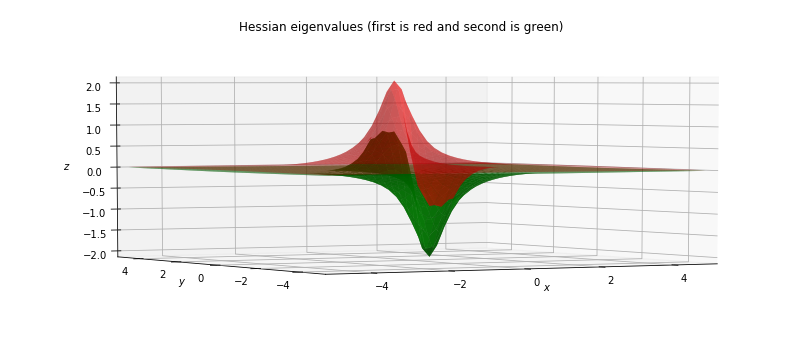

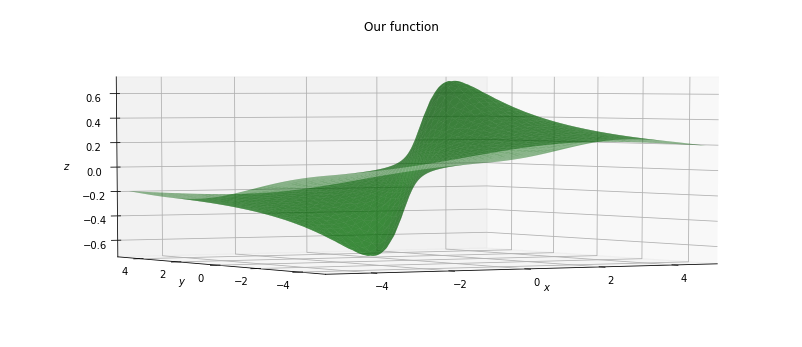

In [43]:
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

fig = pt.figure(figsize=(14,6))
ax = fig.gca(projection="3d")
xmesh, ymesh = np.mgrid[-5:5:50j,-5:5:50j]

fmesh = eigen_1(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh,color='red',alpha=0.4)
fmesh = eigen_2(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh,color='green',alpha=0.8)

ax.set_title('Hessian eigenvalues (first is red and second is green)')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel(r'$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(3,240)

#function plot
def f(x) :
    return (x[0]-x[1])/(x[0]**2 + x[1]**2 +1)

fig = pt.figure(figsize=(14,6))
ax = fig.gca(projection="3d")
#plot only in the search domain
xmesh, ymesh = np.mgrid[-5:5:500j,-5:5:500j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh,color='green',alpha=0.5)

ax.set_title('Our function')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel(r'$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(3,240)


We can see that the red surface is mostly positive but makes a dip to negative values in an area close to the center of the axes.The green surface is mostly negative but makes a peak to positive values close to where the red surface made a dip .The areas where our function is convex are where both eigenvalues are positive,which happens in the area where the green surface peaks up.In the same way ,the areas where our function is concave are where both eigenvalues are negative,which happens in the area where the red surface dips down.


#### Combining convex functions

The following rules may be useful to determine if more complex functions are convex:

1. The intersection of convex functions is convex
2. If the functions $f$ and $g$ are convex and $a \ge 0$ and $b \ge 0$ then the function $af + bg$ is convex.
3. If the function $U$ is convex and the function $g$ is nondecreasing and convex then the function  f  defined by $f (x) = g(U(x))$ is convex.

Many more technical deetails about convexity and convex optimization can be found in this book(http://web.stanford.edu/~boyd/cvxbook/).

### Are there any constraints that the solution must meet?

In general, optimization without constraints is easier to solve than optimization in the presence of constraints. In any case, the solutions may be very different in the presence or absence of constraints, so it is important to know if there are any constraints.

We will see some examples of two general strategies - convert a problem with constraints into one without constraints, or use an algorithm that can optimize with constraints.

Using `scipy.optimize`
----

One of the most convenient libraries to use is `scipy.optimize`, since it is already part of the Anaconda installation and it has a fairly intuitive interface.

In [231]:
from scipy import optimize as opt

#### Minimizing a univariate function $f: \mathbb{R} \rightarrow \mathbb{R}$

In [232]:
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

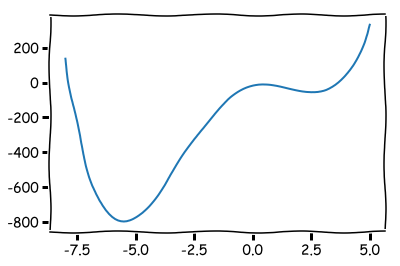

In [43]:
x = np.linspace(-8, 5, 100)
plt.plot(x, f(x))
plt.show()

The [`minimize_scalar`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar) function will find the minimum, and can also be told to search within given bounds. By default, it uses the Brent algorithm, which combines a bracketing strategy with a parabolic approximation.

In [44]:
opt.minimize_scalar(f, method='Brent')

     fun: -803.3955308825884
    nfev: 12
     nit: 11
 success: True
       x: -5.528801125219663

In [45]:
opt.minimize_scalar(f, method='bounded', bounds=[0, 6])

     fun: -54.21003937712762
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 2.668865104039653

### Local and global minima

In [16]:
def f(x, offset):
    return -np.sinc(x-offset)

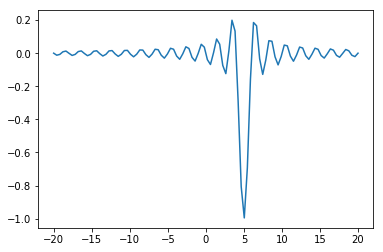

In [17]:
x = np.linspace(-20, 20, 100)
plt.plot(x, f(x, 5))
plt.show()

In [22]:
# note how additional function arguments are passed in
sol = opt.minimize_scalar(f, args=(5,))
sol

     fun: -0.049029624014074166
    nfev: 15
     nit: 10
 success: True
       x: -1.4843871263953001

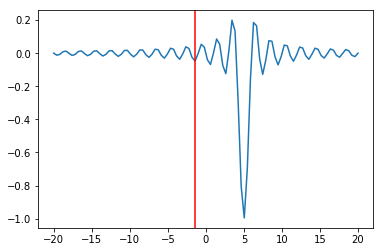

In [23]:
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red')
plt.show()

#### We can try multiple random starts to find the global minimum

In [24]:
lower = np.random.uniform(-20, 20, 100)
upper = lower + 1
sols = [opt.minimize_scalar(f, args=(5,), bracket=(l, u)) for (l, u) in zip(lower, upper)]

In [51]:
idx = np.argmin([sol.fun for sol in sols])
sol = sols[idx]

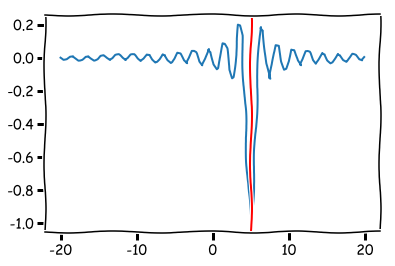

In [52]:
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red')
plt.show()

\begin{exercise}
Find the global minimum of the function $f(x)=x-cos(7x)$ on the interval $[-4,4]$. Plot the function and find graphically the global minimum.
\end{exercise}


In [77]:
def f(x):
    return x-np.cos(7*x)

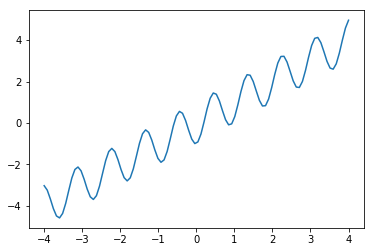

In [78]:
x = np.linspace(-4, 4, 100)
plt.plot(x, f(x))
plt.show()

In [81]:
opt.minimize_scalar(f, method='bounded', bounds=[-4, 4])

     fun: -1.9078194437657499
 message: 'Solution found.'
    nfev: 14
  status: 0
 success: True
       x: -0.9180760898983522

In [84]:
lower =np.random.uniform(-4,4,100)
upper=lower+1
sols=[opt.minimize_scalar(f,bounds=(l,u),method='Bounded') for (l,u) in zip(lower,upper) ]

In [85]:
idx=np.argmin([sol.fun for sol in sols])
sol=sols[idx]
sol

     fun: -4.60061314684272
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: -3.6108697959430165

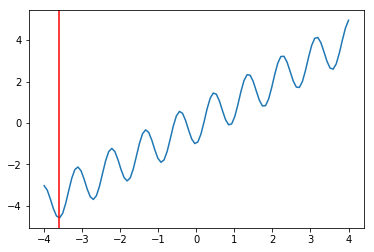

In [86]:
x = np.linspace(-4, 4, 100)
plt.plot(x, f(x))
plt.axvline(sol.x, c='red')
plt.show()

#### Using a stochastic algorithm

See documentation for the [`basinhopping`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.basinhopping.html) algorithm, which also works with multivariate scalar optimization. Note that this is heuristic and not guaranteed to find a global minimum.

In [58]:
def f(x, offset):
    return -np.sinc(x-offset)

In [59]:
from scipy.optimize import basinhopping

x0 = 0
sol = basinhopping(f, x0, stepsize=1, minimizer_kwargs={'args': (5,)})
sol

                        fun: -1.0
 lowest_optimization_result:       fun: -1.0
 hess_inv: array([[0.30397724]])
      jac: array([7.4505806e-09])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([4.99999999])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1821
                        nit: 100
                       njev: 607
                          x: array([4.99999999])

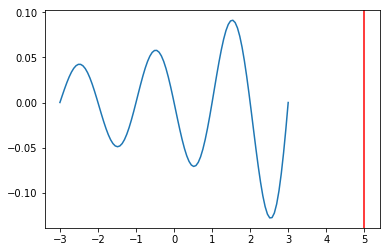

In [60]:
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red')
plt.show()


\begin{exercise}
Apply the above method to the function of the previous exercise and the  following function


Apply the above method to the following function

    a = 17.09
    b = 9.79
    c = 0.6317
    d = 0.9324
    e = 0.4565
    
    def f(x):
        return a*x**4 + b*x**3 + c*x**2 + d*x + e
\end{exercise}

In [99]:
def f(x):
    return x-np.cos(7*x)

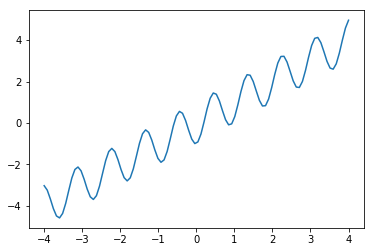

In [100]:
x = np.linspace(-4, 4, 100)
plt.plot(x, f(x))
plt.show()

In [101]:
from scipy.optimize import basinhopping

x0 = 0
sol = basinhopping(f, x0, stepsize=1)
sol

                        fun: -1532.3122406925079
 lowest_optimization_result:       fun: -1532.3122406925079
 hess_inv: array([[0.02067389]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([-1531.32249737])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 2514
                        nit: 100
                       njev: 838
                          x: array([-1531.32249737])

In [102]:
    a = 17.09
    b = 9.79
    c = 0.6317
    d = 0.9324
    e = 0.4565
    
    def f(x):
        return a*x**4 + b*x**3 + c*x**2 + d*x + e

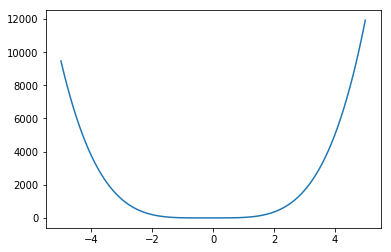

In [103]:
x = np.linspace(-5,5, 100)
plt.plot(x, f(x))
plt.show()

In [104]:
x0 = -100
sol = basinhopping(f, x0, stepsize=1)
sol

                        fun: -0.02668057317931327
 lowest_optimization_result:       fun: -0.02668057317931327
 hess_inv: array([[0.05892237]])
      jac: array([1.56462193e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-0.45491836])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 2817
                        nit: 100
                       njev: 939
                          x: array([-0.45491836])

#### Minimizing a multivariate function $f: \mathbb{R}^n \rightarrow \mathbb{R}$

We will next move on to optimization of multivariate scalar functions, where the scalar may (say) be the norm of a vector. Minimizing a multivariate set of equations  is not well-defined, but we will later see how to solve the closely related problem of finding roots or fixed points of such a set of equations.

We will use the [Rosenbrock "banana" function](http://en.wikipedia.org/wiki/Rosenbrock_function) to illustrate unconstrained multivariate optimization. In 2D, this is
$$
f(x, y) = b(y - x^2)^2 + (a - x)^2
$$

The function has a global minimum at (1,1) and the standard expression takes $a = 1$ and $b = 100$. 

#### Conditioning of optimization problem

With these values for $a$ and $b$, the problem is ill-conditioned. As we shall see, one of the factors affecting the ease of optimization is the condition number of the curvature (Hessian). When the condition number is high, the gradient may not point in the direction of the minimum, and simple gradient descent methods may be inefficient since they may be forced to take many sharp turns.

In [219]:
from sympy import symbols, hessian, Function, N

x, y = symbols('x y')
f = symbols('f', cls=Function)

f = 100*(y - x**2)**2 + (1 - x)**2

H = hessian(f, [x, y]).subs([(x,1), (y,1)])
H, N(H.condition_number())

⎛⎡802   -400⎤                  ⎞
⎜⎢          ⎥, 2508.00960127744⎟
⎝⎣-400  200 ⎦                  ⎠

#### Notice that the condition nymber is the ratio of largest to smallest eigenvalue of the Hessian

In [140]:
import scipy.linalg as la

mu = la.eigvals(np.array([802, -400, -400, 200]).reshape((2,2)))
np.real_if_close(mu[0]/mu[1])

array(2508.00960128)

In [141]:
def rosen(x):
    """Generalized n-dimensional version of the Rosenbrock function"""
    return sum(100*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)

#### Why is the condition number so large?

In [142]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

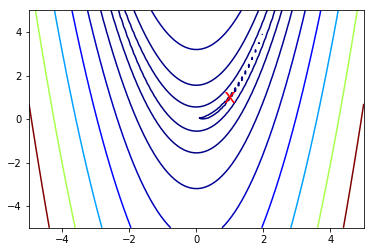

In [143]:
# Note: the global minimum is at (1,1) in a tiny contour island
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
plt.show()

#### Zooming in to the global minimum at (1,1)

In [144]:
x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

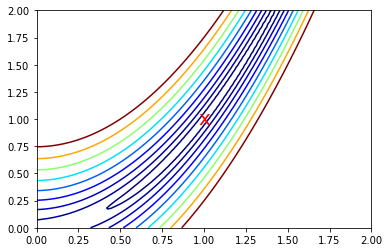

In [145]:
plt.contour(X, Y, Z, [rosen(np.array([k, k])) for k in np.linspace(1, 1.5, 10)], cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
plt.show()

Gradient descent
----

The gradient (or Jacobian) at a point indicates the direction of steepest ascent. Since we are looking for a minimum, one obvious possibility is to take a step in the opposite direction to the gradient. We weight the size of the step by a factor $\alpha$ known in the machine learning literature as the learning rate. If $\alpha$ is small, the algorithm will eventually converge towards a local minimum, but it may take long time. If $\alpha$ is large, the algorithm may converge faster, but it may also overshoot and never find the minimum. Gradient descent is also known as a first order method because it requires calculation of the first derivative at each iteration.

Some algorithms also determine the appropriate value of $\alpha$ at each stage by using a line search, i.e.,
$$
\alpha^* = \arg\min_\alpha f(x_k - \alpha \nabla{f(x_k)})
$$
which is a 1D optimization problem.

As suggested above, the problem is that the gradient may not point towards the global minimum especially when the condition number is large, and we are forced to use a small $\alpha$ for convergence. 

#### Simple gradient descent

Let's warm up by minimizing a trivial function $f(x, y) = x^2 + y^2$ to illustrate the basic idea of gradient descent.

In [5]:
def f(x):
    return x[0]**2 + x[1]**2

def grad(x):
    return np.array([2*x[0], 2*x[1]])

a = 0.1 # learning rate
x0 = np.array([1.0,1.0])
print('Start', x0)
for i in range(41):
    x0 -= a * grad(x0)
    if i%5 == 0:
        print(i, x0)

Start [1. 1.]
0 [0.8 0.8]
5 [0.262144 0.262144]
10 [0.08589935 0.08589935]
15 [0.0281475 0.0281475]
20 [0.00922337 0.00922337]
25 [0.00302231 0.00302231]
30 [0.00099035 0.00099035]
35 [0.00032452 0.00032452]
40 [0.00010634 0.00010634]


\begin{exercise}
Use the above methods to solve the following problem

Non-linear unconstrained optimization problem is:

**Maximize (or minimize) $f(x1,x2...,xn)$ where $f$ is non-linear function.**

Consider the problem:

$$max f(x,y) = \frac{x+y}{x^2-y^2+1}$$

Q: How would we solve this problem analytically?
A: We would need calculus of multiple variables
**Remember from simple calculus of the necessary condition for extremal values**
In case of single value function the **extremal points** of a function f(x) can be found among these points
where the first derivative: 
$ f'(x) = \frac{df}{dx} $ is equal to zero.

In case of multivalued functions the partial derivatives of f are zero at the extremal points!
What will we do here? We will compute so-called “partial” derivatives.

Q: What is partial derivative?
A: If a function depends on multiple variables, we will observe only one variable, and differentiate by it. The
other variables will be considered as constants.

**Example 1**
$ f(x,y) = x^2 + y $
partial derivative with respect to x is: $ \frac{df(x,y)}{dx} = \frac{d}{dx}x^2 + \frac{d}{dx}y = 2x + 0 = 2x $ (y is considered constant)
partial derivative with respect to y is: $ \frac{df(x,y)}{dy} = \frac{d}{dy}x^2 + \frac{d}{dy}y = 0 + 1 = 1 $ (x is considered constant)

\end{exercise}



In [2]:
from sympy import *
x, y = symbols('x y')

def f(x,y):
    return (x+y)/(x**2-y**2+1)

In [3]:
print('Python form of partial derivative of f with respect to x =',diff(f(x,y),x))
print('Python form of partial derivative of f with respect to y =',diff(f(x,y),y))

Python form of partial derivative of f with respect to x = -2*x*(x + y)/(x**2 - y**2 + 1)**2 + 1/(x**2 - y**2 + 1)
Python form of partial derivative of f with respect to y = 2*y*(x + y)/(x**2 - y**2 + 1)**2 + 1/(x**2 - y**2 + 1)


In [4]:
def grad(u):
    x,y=u
    return np.array([-2*x*(x + y)/(x**2 - y**2 + 1)**2 + 1/(x**2 - y**2 + 1),
                    2*y*(x + y)/(x**2 - y**2 + 1)**2 + 1/(x**2 - y**2 + 1)])

In [7]:
a = 0.2 # learning rate
x0 = np.array([0.06,1.1])
print('Start', x0)
for i in range(10000):
    x0 += a * grad(x0)
    if i%5 == 0:
        print(i,'x=', x0)
        a0,b0=x0
        print('\tF(x)=',f(a0,b0))
        print('\tGRADIENT OF F=',grad(x0))

Start [0.06 1.1 ]
0 x= [-1.56249865 12.11195842]
	F(x)= -0.07363951648657936
	GRADIENT OF F= [-0.00537405  0.0054715 ]
5 x= [-1.56786927 12.11742643]
	F(x)= -0.0735807831136971
	GRADIENT OF F= [-0.00536548  0.00546278]
10 x= [-1.57323134 12.12288573]
	F(x)= -0.07352223669420223
	GRADIENT OF F= [-0.00535695  0.00545409]
15 x= [-1.57858489 12.12833635]
	F(x)= -0.07346387618909883
	GRADIENT OF F= [-0.00534845  0.00544543]
20 x= [-1.58392995 12.13377833]
	F(x)= -0.07340570056762066
	GRADIENT OF F= [-0.00533998  0.00543681]
25 x= [-1.58926655 12.1392117 ]
	F(x)= -0.0733477088071467
	GRADIENT OF F= [-0.00533155  0.00542822]
30 x= [-1.59459474 12.1446365 ]
	F(x)= -0.0732898998931175
	GRADIENT OF F= [-0.00532315  0.00541967]
35 x= [-1.59991454 12.15005276]
	F(x)= -0.07323227281895298
	GRADIENT OF F= [-0.00531478  0.00541115]
40 x= [-1.60522599 12.15546051]
	F(x)= -0.0731748265859708
	GRADIENT OF F= [-0.00530645  0.00540266]
45 x= [-1.61052911 12.16085979]
	F(x)= -0.0731175602033062
	GRADIENT O

	GRADIENT OF F= [-0.00386845  0.00393831]
1335 x= [-2.76849686 13.33978044]
	F(x)= -0.062446602681117305
	GRADIENT OF F= [-0.00386468  0.00393447]
1340 x= [-2.77236004 13.34371338]
	F(x)= -0.06241621346589448
	GRADIENT OF F= [-0.00386092  0.00393064]
1345 x= [-2.77621946 13.34764249]
	F(x)= -0.06238588332362974
	GRADIENT OF F= [-0.00385717  0.00392682]
1350 x= [-2.78007513 13.35156779]
	F(x)= -0.062355612053653586
	GRADIENT OF F= [-0.00385343  0.00392301]
1355 x= [-2.78392707 13.35548929]
	F(x)= -0.06232539945626894
	GRADIENT OF F= [-0.0038497   0.00391921]
1360 x= [-2.78777528 13.35940698]
	F(x)= -0.06229524533274502
	GRADIENT OF F= [-0.00384597  0.00391542]
1365 x= [-2.79161976 13.36332089]
	F(x)= -0.06226514948531131
	GRADIENT OF F= [-0.00384226  0.00391164]
1370 x= [-2.79546054 13.36723102]
	F(x)= -0.062235111717151424
	GRADIENT OF F= [-0.00383855  0.00390786]
1375 x= [-2.79929761 13.37113738]
	F(x)= -0.06220513183239738
	GRADIENT OF F= [-0.00383486  0.0039041 ]
1380 x= [-2.8031309

	F(x)= -0.055603929927076925
	GRADIENT OF F= [-0.00306422  0.00311937]
2765 x= [-3.74800933 14.33695154]
	F(x)= -0.0555848218147058
	GRADIENT OF F= [-0.00306212  0.00311723]
2770 x= [-3.7510706  14.34006791]
	F(x)= -0.05556573994243399
	GRADIENT OF F= [-0.00306002  0.00311509]
2775 x= [-3.75412978 14.34318214]
	F(x)= -0.05554668424726494
	GRADIENT OF F= [-0.00305792  0.00311295]
2780 x= [-3.75718686 14.34629424]
	F(x)= -0.0555276546664179
	GRADIENT OF F= [-0.00305582  0.00311082]
2785 x= [-3.76024184 14.3494042 ]
	F(x)= -0.05550865113732701
	GRADIENT OF F= [-0.00305373  0.00310869]
2790 x= [-3.76329474 14.35251204]
	F(x)= -0.05548967359764035
	GRADIENT OF F= [-0.00305164  0.00310656]
2795 x= [-3.76634555 14.35561776]
	F(x)= -0.05547072198521897
	GRADIENT OF F= [-0.00304956  0.00310444]
2800 x= [-3.76939428 14.35872135]
	F(x)= -0.05545179623813594
	GRADIENT OF F= [-0.00304748  0.00310232]
2805 x= [-3.77244093 14.36182283]
	F(x)= -0.05543289629467542
	GRADIENT OF F= [-0.0030454   0.00310

	GRADIENT OF F= [-0.00261253  0.00265943]
4075 x= [-4.48733083 15.08956226]
	F(x)= -0.051327921804686566
	GRADIENT OF F= [-0.00261112  0.00265799]
4080 x= [-4.48994138 15.09221968]
	F(x)= -0.05131404569531172
	GRADIENT OF F= [-0.00260971  0.00265656]
4085 x= [-4.49255053 15.09487566]
	F(x)= -0.05130018457960258
	GRADIENT OF F= [-0.0026083   0.00265512]
4090 x= [-4.49515826 15.0975302 ]
	F(x)= -0.05128633842922929
	GRADIENT OF F= [-0.00260689  0.00265369]
4095 x= [-4.49776459 15.10018332]
	F(x)= -0.051272507215938394
	GRADIENT OF F= [-0.00260548  0.00265226]
4100 x= [-4.50036951 15.102835  ]
	F(x)= -0.051258690911552635
	GRADIENT OF F= [-0.00260408  0.00265083]
4105 x= [-4.50297303 15.10548526]
	F(x)= -0.05124488948797057
	GRADIENT OF F= [-0.00260268  0.0026494 ]
4110 x= [-4.50557515 15.10813409]
	F(x)= -0.05123110291716636
	GRADIENT OF F= [-0.00260128  0.00264797]
4115 x= [-4.50817587 15.11078149]
	F(x)= -0.051217331171189553
	GRADIENT OF F= [-0.00259988  0.00264655]
4120 x= [-4.510775

5260 x= [-5.07029088 15.68297729]
	F(x)= -0.04840495666746463
	GRADIENT OF F= [-0.00232224  0.00236384]
5265 x= [-5.0726127  15.68534071]
	F(x)= -0.048393980612213956
	GRADIENT OF F= [-0.00232118  0.00236277]
5270 x= [-5.07493346 15.68770305]
	F(x)= -0.04838301450603928
	GRADIENT OF F= [-0.00232013  0.0023617 ]
5275 x= [-5.07725317 15.69006432]
	F(x)= -0.04837205833316918
	GRADIENT OF F= [-0.00231908  0.00236063]
5280 x= [-5.07957183 15.69242452]
	F(x)= -0.04836111207786797
	GRADIENT OF F= [-0.00231803  0.00235956]
5285 x= [-5.08188945 15.69478366]
	F(x)= -0.04835017572443547
	GRADIENT OF F= [-0.00231698  0.00235849]
5290 x= [-5.08420601 15.69714173]
	F(x)= -0.04833924925720707
	GRADIENT OF F= [-0.00231594  0.00235743]
5295 x= [-5.08652153 15.69949873]
	F(x)= -0.048328332660553475
	GRADIENT OF F= [-0.00231489  0.00235636]
5300 x= [-5.088836   15.70185467]
	F(x)= -0.04831742591888069
	GRADIENT OF F= [-0.00231385  0.0023553 ]
5305 x= [-5.09114943 15.70420954]
	F(x)= -0.048306529016629914

6690 x= [-5.69552107 16.3193975 ]
	F(x)= -0.045618791814040896
	GRADIENT OF F= [-0.00206264  0.00209951]
6695 x= [-5.6975834 16.3214967]
	F(x)= -0.045610132354378
	GRADIENT OF F= [-0.00206185  0.00209872]
6700 x= [-5.69964494 16.3235951 ]
	F(x)= -0.045601479466200384
	GRADIENT OF F= [-0.00206107  0.00209792]
6705 x= [-5.70170569 16.3256927 ]
	F(x)= -0.045592833140785674
	GRADIENT OF F= [-0.00206029  0.00209712]
6710 x= [-5.70376567 16.3277895 ]
	F(x)= -0.04558419336942803
	GRADIENT OF F= [-0.00205951  0.00209633]
6715 x= [-5.70582487 16.32988551]
	F(x)= -0.0455755601434381
	GRADIENT OF F= [-0.00205873  0.00209553]
6720 x= [-5.70788329 16.33198073]
	F(x)= -0.045566933454143005
	GRADIENT OF F= [-0.00205795  0.00209474]
6725 x= [-5.70994092 16.33407515]
	F(x)= -0.04555831329288624
	GRADIENT OF F= [-0.00205717  0.00209395]
6730 x= [-5.71199778 16.33616878]
	F(x)= -0.04554969965102768
	GRADIENT OF F= [-0.00205639  0.00209316]
6735 x= [-5.71405387 16.33826162]
	F(x)= -0.04554109251994354
	GR

	F(x)= -0.043387404094353335
	GRADIENT OF F= [-0.00186582  0.00189911]
8120 x= [-6.25603975 16.88992785]
	F(x)= -0.04338031826086723
	GRADIENT OF F= [-0.00186521  0.00189849]
8125 x= [-6.25790472 16.8918261 ]
	F(x)= -0.04337323705413895
	GRADIENT OF F= [-0.0018646   0.00189787]
8130 x= [-6.25976907 16.89372372]
	F(x)= -0.04336616046888411
	GRADIENT OF F= [-0.00186399  0.00189725]
8135 x= [-6.26163282 16.89562073]
	F(x)= -0.04335908849982694
	GRADIENT OF F= [-0.00186339  0.00189664]
8140 x= [-6.26349597 16.89751712]
	F(x)= -0.04335202114170029
	GRADIENT OF F= [-0.00186278  0.00189602]
8145 x= [-6.2653585  16.89941289]
	F(x)= -0.043344958389245576
	GRADIENT OF F= [-0.00186217  0.0018954 ]
8150 x= [-6.26722043 16.90130804]
	F(x)= -0.043337900237212776
	GRADIENT OF F= [-0.00186156  0.00189478]
8155 x= [-6.26908175 16.90320258]
	F(x)= -0.04333084668036042
	GRADIENT OF F= [-0.00186096  0.00189417]
8160 x= [-6.27094247 16.90509649]
	F(x)= -0.04332379771345555
	GRADIENT OF F= [-0.00186035  0.0

9545 x= [-6.76466227 17.40761866]
	F(x)= -0.04153113314303523
	GRADIENT OF F= [-0.00170961  0.00174006]
9550 x= [-6.76637168 17.40935853]
	F(x)= -0.041525184101833965
	GRADIENT OF F= [-0.00170912  0.00173956]
9555 x= [-6.7680806  17.41109789]
	F(x)= -0.04151923846787941
	GRADIENT OF F= [-0.00170863  0.00173907]
9560 x= [-6.76978903 17.41283676]
	F(x)= -0.04151329623775792
	GRADIENT OF F= [-0.00170814  0.00173857]
9565 x= [-6.77149698 17.41457513]
	F(x)= -0.04150735740806076
	GRADIENT OF F= [-0.00170765  0.00173807]
9570 x= [-6.77320443 17.416313  ]
	F(x)= -0.041501421975384055
	GRADIENT OF F= [-0.00170716  0.00173757]
9575 x= [-6.7749114  17.41805037]
	F(x)= -0.04149548993632877
	GRADIENT OF F= [-0.00170668  0.00173708]
9580 x= [-6.77661788 17.41978725]
	F(x)= -0.04148956128750077
	GRADIENT OF F= [-0.00170619  0.00173658]
9585 x= [-6.77832387 17.42152363]
	F(x)= -0.04148363602551076
	GRADIENT OF F= [-0.0017057   0.00173608]
9590 x= [-6.78002938 17.42325952]
	F(x)= -0.04147771414697422


It seem's that our function isn't increasing very much after a large number of steps,even with a reasonable learning rate of 0.2.  
Let's visualize the function in a 3d plot.

Text(0.5,0,'$z$')

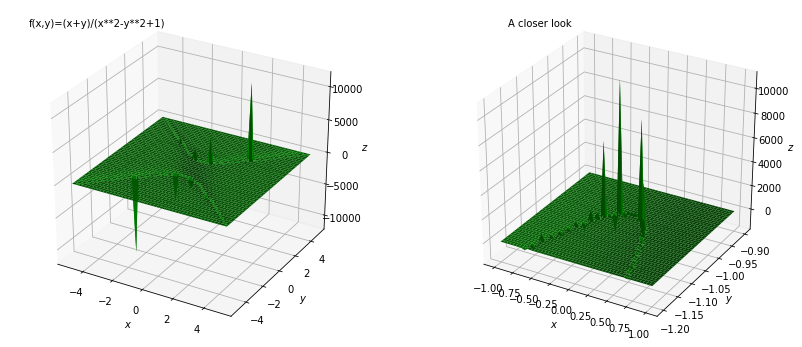

In [209]:
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

def f(x):
    return (x[0]+x[1])/(x[0]**2-x[1]**2+1)

fig = pt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.text2D(0.05, 0.95, "f(x,y)=(x+y)/(x**2-y**2+1)", transform=ax.transAxes)
xmesh, ymesh = np.mgrid[-5:5:50j,-5:5:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh,color='green')
ax.set_xlabel(r'$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')



ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.text2D(0.2, 0.95, "A closer look", transform=ax.transAxes)
xmesh, ymesh = np.mgrid[-1:1:50j,-1.2:-0.9:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh,color='green')
ax.set_xlabel(r'$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')


As we can see ,we are dealing with an asymptotic function.There is no defined global maximum as the function shoots up to infinity and down to negative infinity at certain locations (which seem to form a hyperbola when looking at the function from a vertical point of view).At the rest of the xy plane,not much is happening in terms of the function increasing or decreasing and its almost flat.This causes the gradient to have very small values regardless of the starting point and therefore ,our step size gets really small even with a high learning rate.

### Gradient descent for least squares minimization

Usually, when we optimize, we are not just finding the minimum, but also want to know the parameters that give us the minimum. As a simple example, suppose we want to find parameters that minimize the least squares difference between a linear model and some data.  Suppose we have some data $(0,1), (1,2), (2,3), (3,3.5), (4,6), (5,9), (6,8)$ and want to find a line $y = \beta_0  +\beta_1 x$ that is the best least squares fit. One way to do this is to solve $X^TX\hat{\beta} = X^Ty$, but we want to show how this can be formulated as a gradient descent problem.

We want to find $\beta = (\beta_0, \beta_1)$ that minimize the squared differences

$$
r = \sum(\beta_0 + \beta_1 x - y)^2
$$

We calculate the gradient with respect to $\beta$ as 

$$\nabla r = \pmatrix{ \frac{\delta r}{\delta \beta_0} \\ \frac{\delta r}{\delta \beta_0}}$$

and apply gradient descent.

In [9]:
def f(x, y, b):
    """Helper function."""
    return (b[0] + b[1]*x - y)

def grad(x, y, b):
    """Gradient of objective function with respect to parameters b."""
    n = len(x)
    return np.array([
            sum(f(x, y, b)),
            sum(x*f(x, y, b))
    ])

In [148]:
x, y = map(np.array, zip((0,1), (1,2), (2,3), (3,3.5), (4,6), (5,9), (6,8)))

In [11]:
a = 0.001 # learning rate
b0 = np.zeros(2)
for i in range(10000):
    b0 -= a * grad(x, y, b0)

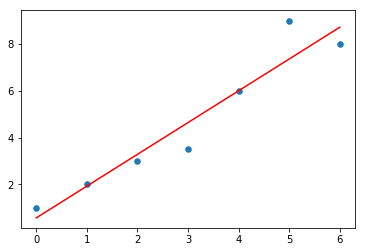

In [12]:
plt.scatter(x, y, s=30)
plt.plot(x, b0[0] + b0[1]*x, color='red')
plt.show()

\begin{exercise}

Let's create a set of 20 points around the line $y = 2x+17+\epsilon$, for values of x between 0 and 10:

    f = lambda x: x*2+17+np.random.randn(len(x))*10
    x = np.random.random(20)*10
    y = f(x) 
    m = len(y)
Apply  the above codes to find a line approximation  to the above data
\end{exercise}

In [151]:
f = lambda x: x*2+17+np.random.randn(len(x))*10
x = np.random.random(20)*10
y = f(x) 
m = len(y)

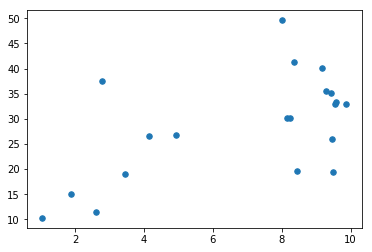

In [146]:
plt.scatter(x, y, s=30)
plt.show()

In [153]:
def f(x, y, b):
    """Helper function."""
    return (b[0] + b[1]*x - y)

def grad(x, y, b):
    """Gradient of objective function with respect to parameters b."""
    n = len(x)
    return np.array([
            sum(f(x, y, b)),
            sum(x*f(x, y, b))
    ])



a = 0.001 # learning rate
b0 = np.zeros(2)
for i in range(10000):
    b0 -= a * grad(x, y, b0)



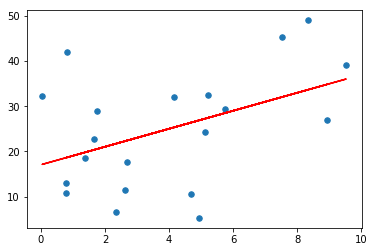

Approximated coefficients are [17.07038966  1.98771535]


In [156]:
plt.scatter(x, y, s=30)
plt.plot(x, b0[0] + b0[1]*x, color='red')
plt.show()
print('Approximated coefficients are',b0)

### Gradient descent to minimize the Rosen function using `scipy.optimize`

Because gradient descent is unreliable in practice, it is not part of the `scipy` optimize suite of functions, but we will write a custom function below to illustrate how to use gradient descent while maintaining the `scipy.optimize` interface.

In [ ]:
def rosen(x):
    """Generalized n-dimensional version of the Rosenbrock function"""
    return sum(100*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)

In [158]:
def rosen_der(x):
    """Derivative of generalized Rosen function."""
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

**Warning** One of the most common causes of failure of optimization is because the gradient  or Hessian function is specified incorrectly. You can check for this using `check_grad` which compares the analytical gradient with one calculated using finite differences.

In [31]:
from scipy.optimize import check_grad

for x in np.random.uniform(-2,2,(10,2)):
    x0 = np.array(x)
    print(x0, check_grad(rosen, rosen_der, x0))

[0.8551378  1.16517242] 2.8759815700189108e-06
[-1.17259043  0.72987861] 1.0452875690029854e-05
[ 0.97194102 -1.19504381] 1.0388081826785837e-05
[0.20454152 1.26975528] 2.3385600307048826e-06
[ 0.24797801 -0.73210042] 2.9736613107574732e-06
[-1.99792041  0.66099711] 3.143192742823374e-05
[1.38417223 0.86232543] 1.4039882083237137e-05
[-1.06285521 -0.19205783] 1.1611051641706488e-05
[-1.12166516  1.98428888] 4.2121248005746475e-06
[-1.8060511  -1.37195957] 7.911689644156928e-05


#### Writing a custom gradient descen function for the `scipy.optimize` interface.

In [32]:
def custmin(fun, x0, args=(), maxfev=None, alpha=0.0002,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the Rosen function."""
    bestx = x0
    besty = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        # the next 2 lines are gradient descent
        step = alpha * rosen_der(bestx)
        bestx = bestx - step

        besty = fun(bestx)
        funcalls += 1
        
        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=besty, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

In [195]:
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

In [34]:
# Initial starting position
x0 = np.array([4,-4.1])

In [37]:
ps = [x0]
opt.minimize(rosen, x0, method=custmin, callback=reporter)

     fun: 1.060466347344834e-08
    nfev: 100001
     nit: 100000
 success: True
       x: array([0.9998971 , 0.99979381])

In [38]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

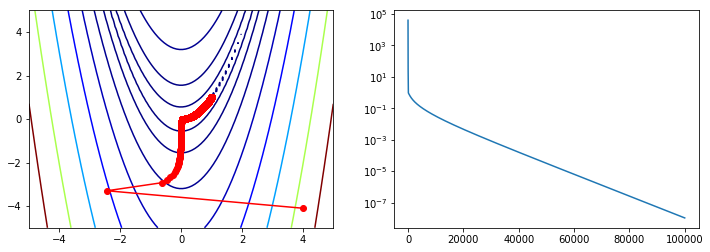

In [39]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T))
plt.show()


\begin{exercise}
Apply the above routine to the following function

    def f(x):
            y = (1-x[0])**2+100*((x[1]-x[0]**2)**2)
            return y
\end{exercise}




Find the gradient

In [121]:
from sympy import *

x, y = symbols('x y')
fun = symbols('fun', cls=Function)

fun = (1-x)**2 + 100*((y-x**2)**2)

print('Gradient of f is [',diff(fun,x),',',diff(fun,y),']')

Gradient of f is [ -400*x*(-x**2 + y) + 2*x - 2 , -200*x**2 + 200*y ]


In [122]:
def f(x):
        y = (1-x[0])**2+100*((x[1]-x[0]**2)**2)
        return y

In [123]:
def gradf(x):
    
    return [-400*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2 ,-200*x[0]**2 + 200*x[1]]

In [124]:
from scipy.optimize import check_grad

for x in np.random.uniform(-2,2,(10,2)):
    x0 = np.array(x)
    print(x0, check_grad(f, gradf, x0))

[1.37349417 1.16578904] 1.3062920827738861e-05
[-0.39459367 -0.89636339] 7.1816566334035095e-06
[1.17633945 1.94809519] 6.289252558651168e-06
[0.35354034 1.35961388] 1.7255386310878275e-06
[ 1.37486016 -1.17107913] 2.0927069680226752e-05
[1.35903341 1.88149624] 1.0971922787004633e-05
[-1.06951511 -0.27907054] 7.71658454996893e-06
[-0.85023021 -0.60357695] 1.0925071654542346e-05
[-0.7659958  -1.56785017] 1.9693718079095323e-05
[-1.00844828  0.18388336] 8.423352851935808e-06


Differences are all very small so our gradient is good.

In [125]:
def custmin(fun, x0, args=(), maxfev=None, alpha=0.0002,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the  function."""
    bestx = x0
    besty = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        # the next 2 lines are gradient descent
        step = np.array(list(map(lambda x:x*alpha,gradf(bestx))))
        bestx = bestx - step

        besty = fun(bestx)
        funcalls += 1
        
        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=besty, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

In [126]:
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

In [127]:
# Initial starting position
x0 = np.array([4,-4.1])

ps = [x0]
opt.minimize(f, x0, method=custmin, callback=reporter)

     fun: 1.060466347353973e-08
    nfev: 100001
     nit: 100000
 success: True
       x: array([0.9998971 , 0.99979381])

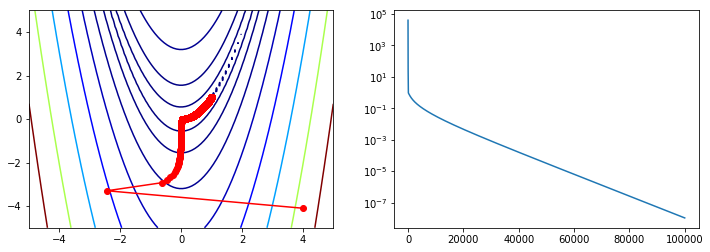

In [128]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)),f(ps.T))
plt.show()

### Newton's method and variants

Recall Newton's method for finding roots of a univariate function

$$
x_{K+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

When we are looking for a minimum, we are looking for the roots of the *derivative* $f'(x)$, so

$$
x_{K+1} = x_k - \frac{f'(x_k}{f''(x_k)}
$$

Newton's method can also be seen as a Taylor series approximation

$$
f(x+h) = f(x) + h f'(x) + \frac{h^2}{2}f''(x)
$$

At the function minimum, the derivative is 0, so
\begin{align}
\frac{f(x+h) - f(x)}{h} &= f'(x) + \frac{h}{2}f''(x) \\
0 &= f'(x) + \frac{h}{2}f''(x) 
\end{align}

and letting $\Delta x = \frac{h}{2}$, we get that the Newton step is

$$
\Delta x = - \frac{f'(x)}{f''(x)}
$$

The multivariate analog replaces $f'$ with the Jacobian and $f''$ with the Hessian, so the Newton step is

$$
\Delta x = -H^{-1}(x) \nabla f(x)
$$

#### Second order methods

Second order methods solve for $H^{-1}$ and so require calculation of the Hessian (either provided or approximated using finite differences). For efficiency reasons, the Hessian is not directly inverted, but solved for using a variety of methods such as conjugate gradient. An example of a second order method in the `optimize` package is `Newton-GC`.

In [228]:
from scipy.optimize import rosen, rosen_der, rosen_hess

In [237]:
ps = [x0]
opt.minimize(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, callback=reporter)

     fun: 1.3642782750354208e-13
     jac: array([ 1.21204353e-04, -6.08502470e-05])
 message: 'Optimization terminated successfully.'
    nfev: 38
    nhev: 26
     nit: 26
    njev: 63
  status: 0
 success: True
       x: array([0.99999963, 0.99999926])

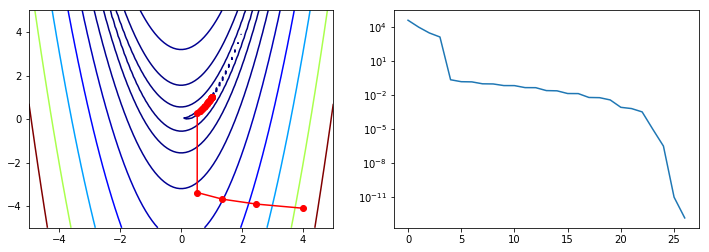

In [232]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T))
plt.show()

#### First order methods

As calculating the Hessian is computationally expensive, first order methods only use the first derivatives. Quasi-Newton methods use functions of the first derivatives to approximate the inverse Hessian. A well know example of the Quasi-Newoton class of algorithjms is BFGS, named after the initials of the creators. As usual, the first derivatives can either be provided via the `jac=` argument or approximated by finite difference methods.

In [238]:
ps = [x0]
opt.minimize(rosen, x0, method='BFGS', callback=reporter)

      fun: 9.48988612333806e-12
 hess_inv: array([[0.49995593, 0.99988908],
       [0.99988908, 2.00468039]])
      jac: array([ 4.39252450e-05, -2.03651389e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 56
     njev: 132
   status: 2
  success: False
        x: array([0.99999712, 0.99999413])

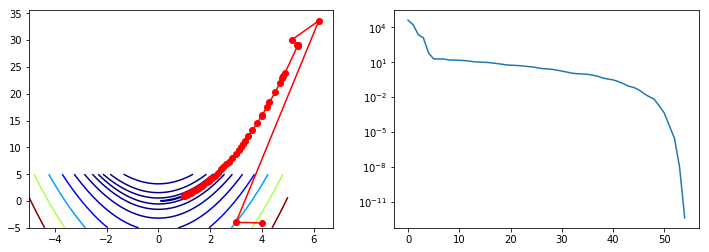

In [44]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T))
plt.show()

#### Zeroth order methods

Finally, there are some optimization algorithms not based on the Newton method, but on other heuristic search strategies that do not require any derivatives, only function evaluations. One well-known example is the Nelder-Mead simplex algorithm.

In [243]:
ps = [x0]
opt.minimize(rosen, x0, method='nelder-mead', callback=reporter)

 final_simplex: (array([[0.99998846, 0.99997494],
       [0.99994401, 0.99989075],
       [1.0000023 , 1.0000149 ]]), array([5.26275688e-10, 3.87529507e-09, 1.06085894e-08]))
           fun: 5.262756878429089e-10
       message: 'Optimization terminated successfully.'
          nfev: 162
           nit: 85
        status: 0
       success: True
             x: array([0.99998846, 0.99997494])

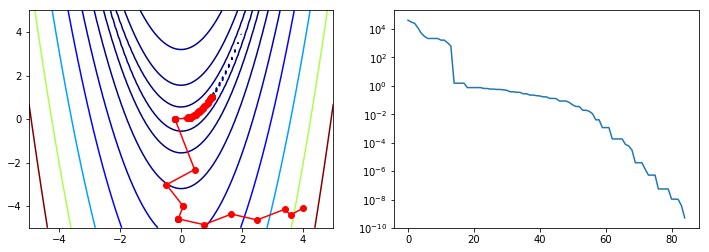

In [241]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T))
plt.show()

\begin{exercise}

 Apply the Newton's method and variants above to the following function

$f(x,y)=\left(1.5-x+xy\right)^{2}+\left(2.25-x+xy^{2}\right)^{2}
+\left(2.625-x+xy^{3}\right)^{2}$
\end{exercise}


In [129]:
from scipy.optimize import *
from numdifftools import Jacobian, Hessian

def f(x):
    return((1.5-x[0] +x[0]*x[1])**2 + (2.25-x[0] +x[0]*x[1]**2)**2 + (2.625-x[0] +x[0]*x[1]**3)**2)

def gradf(x):
    return Jacobian(lambda x:f(x))(x).ravel()
def hessf(x):
    return Hessian(lambda x:f(x))(x)   

In [130]:
x0=np.array([4,2])


ps = [x0]
minimize(f, x0, method='Newton-CG', jac=gradf, hess=hessf, callback=reporter)

     fun: 4.569877386921143e-28
     jac: array([-6.48419368e-08,  5.91393621e-08])
 message: 'Optimization terminated successfully.'
    nfev: 23
    nhev: 19
     nit: 19
    njev: 41
  status: 0
 success: True
       x: array([3. , 0.5])

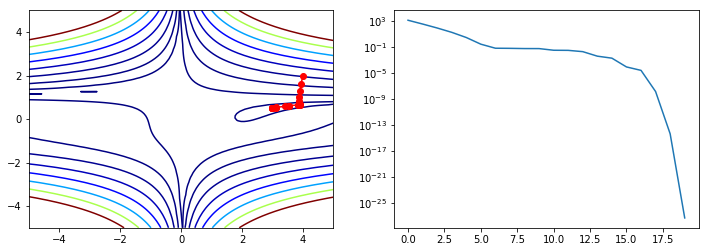

In [131]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)),f(ps.T))
plt.show()

In [132]:
ps = [x0]
minimize(f, x0, method='BFGS', callback=reporter)

      fun: 2.6539885185172142e-11
 hess_inv: array([[3.26011301, 0.79868275],
       [0.79868275, 0.21753028]])
      jac: array([3.14635166e-06, 4.31967697e-06])
  message: 'Optimization terminated successfully.'
     nfev: 124
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([3.00001284, 0.50000327])

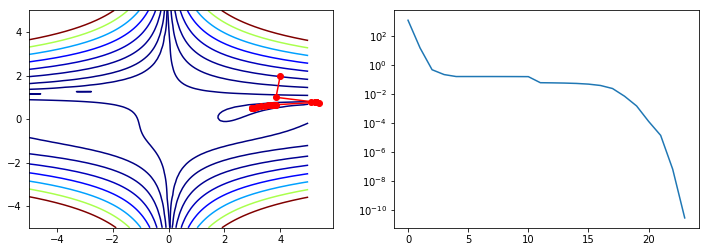

In [133]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)),f(ps.T))
plt.show()

In [134]:
ps = [x0]
minimize(f, x0, method='nelder-mead', callback=reporter)

 final_simplex: (array([[3.00000967, 0.50000219],
       [2.99994779, 0.4999871 ],
       [2.9999437 , 0.49999092]]), array([1.60005780e-11, 4.36433908e-10, 1.05642109e-09]))
           fun: 1.6000578020764822e-11
       message: 'Optimization terminated successfully.'
          nfev: 98
           nit: 51
        status: 0
       success: True
             x: array([3.00000967, 0.50000219])

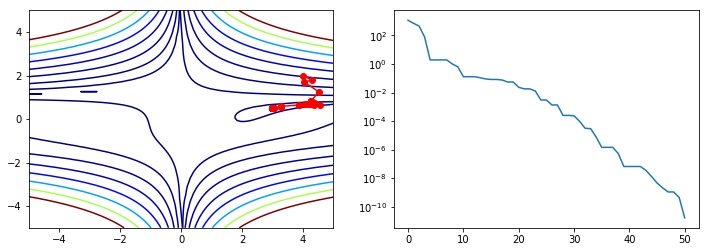

In [135]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)),f(ps.T))
plt.show()

### Lagrange multipliers and constrained optimization

Recall why Lagrange multipliers are useful for constrained optimization - a stationary point must be where the constraint surface $g$ touches a level set of the function $f$ (since the value of $f$ does not change on a level set). At that point, $f$ and $g$ are parallel, and hence their gradients are also parallel (since the gradient is normal to the level set). So we want to solve

$$\nabla f = -\lambda \nabla g$$

or equivalently,

$$\nabla f + \lambda \nabla g = 0$$

![Lagrange multipliers](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/LagrangeMultipliers2D.svg/300px-LagrangeMultipliers2D.svg.png)

#### Numerical example of using Lagrange multipliers

Maximize $f (x, y, z) = xy + yz$ subject to the constraints $x + 2y = 6$ and $x − 3z = 0$.

We set up the equations

$$
F (x, y, z, λ, μ) = xy + yz − λ(x + 2y − 6) − μ(x − 3z)
$$

Now set partial derivatives to zero and solve the following set of equations

\begin{align}
y - \lambda - \mu &= 0 \\
x + z - 2\lambda &= 0 \\
y +3\mu &= 0 \\
x + 2y - 6 &= 0 \\
x - 3z &= 0
\end{align}

which is a linear equation in $x, y, z, \lambda, \mu$

$$
\begin{pmatrix}
0 & 1 & 0 & -1 & -1 \\
1 & 0 & 1 & -2 & 0 \\
0 & 1 & 0 & 0 & 3 \\
1 & 2 & 0 & 0 & 0 \\
1 & 0 & -3 & 0 & 0 \\
\end{pmatrix}\pmatrix{x \\ y \\ z \\ \lambda \\ \mu} = \pmatrix{0 \\ 0 \\ 0 \\ 6 \\ 0}
$$

In [47]:
A = np.array([
    [0, 1, 0, -1, -1],
    [1, 0, 1, -2, 0],
    [0, 1, 0, 0, 3],
    [1, 2, 0, 0, 0],
    [1, 0,-3, 0, 0]])

b = np.array([0,0,0,6,0])

sol = la.solve(A, b)

In [48]:
sol

array([ 3. ,  1.5,  1. ,  2. , -0.5])

In [49]:
def f(x, y, z):
    return x*y + y*z

In [50]:
f(*sol[:3])

6.0

### Check using `scipy.optimize`

In [51]:
# Convert to minimization problem by negating function
def f(x):
    return -(x[0]*x[1] + x[1]*x[2])

In [52]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0] + 2*x[1] - 6, x[0] - 3*x[2]])})

In [53]:
x0 = np.array([2,2,0.67])
cx = opt.minimize(f, x0, constraints=cons)
cx

     fun: -5.999999999999969
     jac: array([-1.50000012, -3.9999997 , -1.50000012])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([2.99999979, 1.50000011, 0.99999993])

### Another example of constrained optimization

Many real-world optimization problems have constraints - for example, a set of parameters may have to sum to 1.0 (equality constraint), or some parameters may have to be non-negative (inequality constraint). Sometimes, the constraints can be incorporated into the function to be minimized, for example, the non-negativity constraint $p \gt 0$ can be removed by substituting $p = e^q$ and optimizing for $q$. Using such workarounds, it may be possible to convert a constrained optimization problem into an unconstrained one, and use the methods discussed above to solve the problem.

Alternatively, we can use optimization methods that allow the specification of constraints directly in the problem statement as shown in this section. Internally, constraint violation penalties, barriers and Lagrange multipliers are some of the methods used used to handle these constraints. We use the example provided in the Scipy [tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) to illustrate how to set constraints.

$$
f(x) = -(2xy + 2x - x^2 -2y^2)
$$
subject to the constraint
$$
x^3 - y = 0 \\
y - (x-1)^4 - 2 \ge 0
$$
and the bounds
$$
0.5 \le x \le 1.5 \\
1.5 \le y \le 2.5
$$

In [54]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

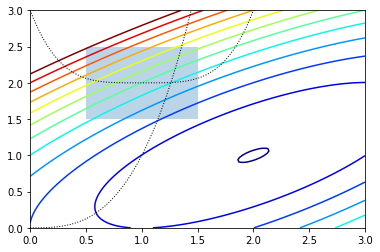

In [55]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3])
plt.show()

To set constraints, we pass in a dictionary with keys `type`, `fun` and `jac`. Note that the inequality constraint assumes a $C_j x \ge 0$ form. As usual, the `jac` is optional and will be numerically estimate if not provided.

In [97]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

bnds = ((0.5, 1.5), (1.5, 2.5))

In [98]:
x0 = [0, 2.5]

Unconstrained optimization

In [99]:
ux = opt.minimize(f, x0, constraints=None)
ux

      fun: -1.9999999999996365
 hess_inv: array([[ 0.99829115,  0.50105608],
       [ 0.50105608,  0.4993548 ]])
      jac: array([  1.25169754e-06,  -1.41561031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([ 2.00000043,  0.99999985])

Constrained optimization

In [100]:
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

     fun: 2.0499154720910759
     jac: array([-3.48747861,  5.49674439,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 1.26089314,  2.00463288])

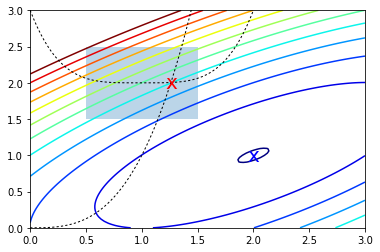

In [101]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(ux['x'][0], ux['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3])
plt.show()


\begin{exercise}
Apply the above methods to solve the optimization problem 

  objective function  $f(x,y)=8x^2-2y$
  subject to constraints  $x^2+y^2=1$
    
\end{exercise}


We want to maximize f so to use scipy.optimize we turn it to a minimization problem by negating f.

In [44]:
from scipy import optimize as opt
import matplotlib.pyplot as plt
def f(x):
    return -8*x[0]**2 + 2*x[1]

In [45]:
cons=({'type':'eq',
      'fun':lambda x:np.array([x[0]**2 + x[1]**2-1]),
      'jac':lambda x:np.array([2*x[0],2*x[1]])})

In [47]:
x0=[-1,1]

cx=opt.minimize(f,x0,constraints=cons)
cx

     fun: -8.12500000569337
     jac: array([15.87453187,  2.        ])
 message: 'Optimization terminated successfully.'
    nfev: 40
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([-0.99215825, -0.12498803])

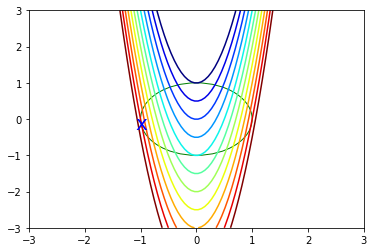

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = -f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))# -f to show the maximization problem
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
circ = plt.Circle((0, 0), radius=1, edgecolor='g', facecolor='None')#circle
ax.add_patch(circ)
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='blue') #maximization solution
plt.show()

Playing around with the starting point,we observe that the solution we get is one of the 4 points where the unit circle (our constraint) is tangent to the contours of our function.Of course ,we can see that the points where our function is largest, are the left and right points where the unit circle "kisses" a contour of f.

Now let's use Lagrange multipliers to solve the same problem.  
<center>$F(x)=8x^2-2y -λ(x^2+y^2-1)$  </center>
We set all partial derivatives = 0 and we get the system  
\begin{align}
(16-2λ)x=0 \\
-2-2λy=0 \\
x^2 + y^2-1 =0\\
\end{align}

eq (29) gives $x=0$ or $λ=8$  

eq (30) gives $y=-1/λ$  

if $x=0$ then from eq (31) we get $y=+-1$ ,so two possible solutions are $(0,-1)$ and $(0,1)$  
if $λ=8$ then from eq (30) $y=-1/8$ and from eq (31) $x^2=1-(-1/8)^2$ ,so the other two possible solutions are $(0.99125,-0.125)$ and $(-0.99125,-0.125)$ with $x$ rounded off to 5 decimal places.



In [69]:
-f((0,1)) , -f((0,-1)) ,-f((0.99215,-0.125)),-f((-0.99215,-0.125))

(-2, 2, 8.124892979999998, 8.124892979999998)

Therefore,our function is maximized (with the given constraint) at $(0.99125,-0.125)$ and $(-0.99125,-0.125)$ where the value of the function is about $8.125$.

### Some applications of optimization

#### Curve fitting

Sometimes, we simply want to use non-linear least squares to fit a function to data, perhaps to estimate parameters for a mechanistic or phenomenological model. The `curve_fit` function uses the quasi-Newton Levenberg-Marquadt algorithm to perform such fits. Behind the scenes, `curve_fit` is just a wrapper around the `leastsq` function that does nonlinear least squares fitting.

In [70]:
from scipy.optimize import curve_fit 

In [71]:
def logistic4(x, a, b, c, d):
    """The four paramter logistic function is often used to fit dose-response relationships."""
    return ((a-d)/(1.0+((x/c)**b))) + d

In [72]:
nobs = 24
xdata = np.linspace(0.5, 3.5, nobs)
ptrue = [10, 3, 1.5, 12]
ydata = logistic4(xdata, *ptrue) + 0.5*np.random.random(nobs)

In [74]:
popt, pcov = curve_fit(logistic4, xdata, ydata) 

In [106]:
perr = yerr=np.sqrt(np.diag(pcov))
print('Param\tTrue\tEstim (+/- 1 SD)')
for p, pt, po, pe  in zip('abcd', ptrue, popt, perr):
    print('%s\t%5.2f\t%5.2f (+/-%5.2f)' % (p, pt, po, pe))

Param	True	Estim (+/- 1 SD)
a	10.00	10.39 (+/- 0.09)
b	 3.00	 5.84 (+/- 1.21)
c	 1.50	 1.42 (+/- 0.06)
d	12.00	12.02 (+/- 0.06)


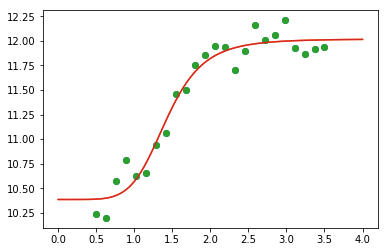

In [108]:
x = np.linspace(0, 4, 100)
y = logistic4(x, *popt)
plt.plot(xdata, ydata, 'o')
plt.plot(x, y)
plt.show()

\begin{exercise}
consider the data set 

    x = [0.15,0.4,0.6,1.01,1.5,2.2,2.4,2.7,2.9,3.5,3.8,4.4,4.6,5.1,6.6,7.6]; 
    y = [4.5,5.1,5.7,6.3,7.1,7.6,7.5,8.1,7.9,8.2,8.5,8.7,9.0,9.2,9.5,9.9]; 
Determine an approximation of the data using the function $y=\beta x^\alpha$ using an optimization method as above.
Plot the points and the function in the same graph.
\end{exercise}


In [84]:
xdata = [0.15,0.4,0.6,1.01,1.5,2.2,2.4,2.7,2.9,3.5,3.8,4.4,4.6,5.1,6.6,7.6]
ydata = [4.5,5.1,5.7,6.3,7.1,7.6,7.5,8.1,7.9,8.2,8.5,8.7,9.0,9.2,9.5,9.9]

In [85]:
def power(x,a,b):
    return b*x**a


In [86]:
popt, pcov = curve_fit(power, xdata, ydata) 

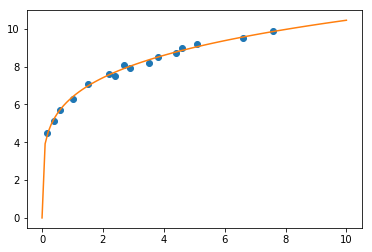

In [88]:
x = np.linspace(0, 10, 100)
y = power(x, *popt)
plt.plot(xdata, ydata, 'o')
plt.plot(x, y)
plt.show()

# Read the following material


### Finding parameters for ODE models

This is a specialized application of `curve_fit`, in which the curve to be fitted is defined implicitly by an ordinary differential equation 
$$
\frac{dx}{dt} = -kx
$$
and we want to use observed data to estimate the parameters $k$ and the initial value $x_0$. Of course this can be explicitly solved but the same approach can be used to find multiple parameters for $n$-dimensional systems of ODEs.

[A more elaborate example for fitting a system of ODEs to model the zombie apocalypse](http://adventuresinpython.blogspot.com/2012/08/fitting-differential-equation-system-to.html)

In [109]:
from scipy.integrate import odeint

def f(x, t, k):
    """Simple exponential decay."""
    return -k*x

def x(t, k, x0):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(k,))
    return x.ravel()

In [110]:
# True parameter values
x0_ = 10
k_ = 0.1*np.pi

# Some random data genererated from closed form soltuion plus Gaussian noise
ts = np.sort(np.random.uniform(0, 10, 200))
xs = x0_*np.exp(-k_*ts) + np.random.normal(0,0.1,200)

popt, cov = curve_fit(x, ts, xs)
k_opt, x0_opt = popt

print("k = %g" % k_opt)
print("x0 = %g" % x0_opt)

k = 0.31363
x0 = 9.91056


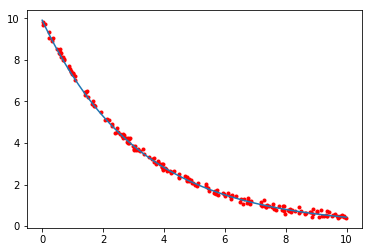

In [111]:
import matplotlib.pyplot as plt
t = np.linspace(0, 10, 100)
plt.plot(ts, xs, 'r.', t, x(t, k_opt, x0_opt), '-')
plt.show()

### Another example of fitting a system of ODEs using the `lmfit` package

You may have to install the [`lmfit`](http://cars9.uchicago.edu/software/python/lmfit/index.html) package using `pip` and restart your kernel. The `lmfit` algorithm is another wrapper around `scipy.optimize.leastsq` but allows for richer model specification and more diagnostics.

In [114]:
from lmfit import minimize, Parameters, Parameter, report_fit
import warnings

In [115]:
def f(xs, t, ps):
    """Lotka-Volterra predator-prey model."""
    try:
        a = ps['a'].value
        b = ps['b'].value
        c = ps['c'].value
        d = ps['d'].value
    except:
        a, b, c, d = ps
        
    x, y = xs
    return [a*x - b*x*y, c*x*y - d*y]

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['x0'].value, ps['y0'].value
    model = g(ts, x0, ps)
    return (model - data).ravel()

t = np.linspace(0, 10, 100)
x0 = np.array([1,1])

a, b, c, d = 3,1,1,1
true_params = np.array((a, b, c, d))

np.random.seed(123)
data = g(t, x0, true_params)
data += np.random.normal(size=data.shape)

# set parameters incluing bounds
params = Parameters()
params.add('x0', value= float(data[0, 0]), min=0, max=10)  
params.add('y0', value=float(data[0, 1]), min=0, max=10)  
params.add('a', value=2.0, min=0, max=10)
params.add('b', value=2.0, min=0, max=10)
params.add('c', value=2.0, min=0, max=10)
params.add('d', value=2.0, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '-', linewidth=2);

# display fitted statistics
report_fit(result)

C:\Users\elias\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[[Fit Statistics]]
    # function evals   = 146
    # data points      = 200
    # variables        = 6
    chi-square         = 212.716
    reduced chi-square = 1.096
    Akaike info crit   = 24.328
    Bayesian info crit = 44.118
[[Variables]]
    x0:   1.02054652 +/- 0.181681 (17.80%) (init= 0)
    y0:   1.07046882 +/- 0.110178 (10.29%) (init= 1.997345)
    a:    3.54336034 +/- 0.454141 (12.82%) (init= 2)
    b:    1.21278702 +/- 0.148470 (12.24%) (init= 2)
    c:    0.84529480 +/- 0.079477 (9.40%) (init= 2)
    d:    0.85716361 +/- 0.085632 (9.99%) (init= 2)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      =  0.960 
    C(a, d)                      = -0.956 
    C(b, d)                      = -0.878 
    C(x0, b)                     = -0.759 
    C(x0, a)                     = -0.745 
    C(y0, c)                     = -0.717 
    C(y0, d)                     = -0.682 
    C(c, d)                      =  0.667 
    C(x0, d)                   

#### Optimization of graph node placement

To show the many different applications of optimization, here is an example using optimization to change the layout of nodes of a graph. We use a physical analogy - nodes are connected by springs, and the springs resist deformation from their natural length $l_{ij}$. Some nodes are pinned to their initial locations while others are free to move. Because the initial configuration of nodes does not have springs at their natural length, there is tension resulting in a high potential energy $U$, given by the physics formula shown below. Optimization finds the configuration of lowest potential energy given that some nodes are fixed (set up as boundary constraints on the positions of the nodes).

$$
U = \frac{1}{2}\sum_{i,j=1}^n ka_{ij}\left(||p_i - p_j||-l_{ij}\right)^2
$$

Note that the ordination algorithm Multi-Dimensional Scaling (MDS) works on a very similar idea - take a high dimensional data set in $\mathbb{R}^n$, and project down to a lower dimension ($\mathbb{R}^k$) such that the sum of distances $d_n(x_i, x_j) - d_k(x_i, x_j)$, where $d_n$ and $d_k$ are some measure of distance between two points $x_i$ and $x_j$ in $n$ and $d$ dimension respectively, is minimized. MDS is often used in exploratory analysis of high-dimensional data to get some intuitive understanding of its "structure".

In [116]:
from scipy.spatial.distance import pdist, squareform

- P0 is the initial location of nodes
- P is the minimal energy location of nodes given constraints
- A is a connectivity matrix - there is a spring between $i$ and $j$ if $A_{ij} = 1$
- $L_{ij}$ is the resting length of the spring connecting $i$ and $j$
- In addition, there are a number of `fixed` nodes whose positions are pinned.

In [117]:
n = 20
k = 1 # spring stiffness
P0 = np.random.uniform(0, 5, (n,2)) 
A = np.ones((n, n))
A[np.tril_indices_from(A)] = 0
L = A.copy()

In [118]:
def energy(P):
    P = P.reshape((-1, 2))
    D = squareform(pdist(P))
    return 0.5*(k * A * (D - L)**2).sum()

In [119]:
energy(P0.ravel())

In [120]:
# fix the position of the first few nodes just to show constraints
fixed = 4
bounds = (np.repeat(P0[:fixed,:].ravel(), 2).reshape((-1,2)).tolist() + 
          [[None, None]] * (2*(n-fixed)))
bounds[:fixed*2+4]

[[1.191249528562059, 1.191249528562059],
 [4.0389554314507805, 4.0389554314507805],
 [4.474891439430058, 4.474891439430058],
 [0.216114460398234, 0.216114460398234],
 [1.5097341813135952, 1.5097341813135952],
 [4.902910992971438, 4.902910992971438],
 [2.6975241127686767, 2.6975241127686767],
 [3.1315468085492815, 3.1315468085492815],
 [None, None],
 [None, None],
 [None, None],
 [None, None]]

In [121]:
sol = opt.minimize(energy, P0.ravel(), bounds=bounds)

#### Visualization

Original placement is BLUE
Optimized arrangement is RED.

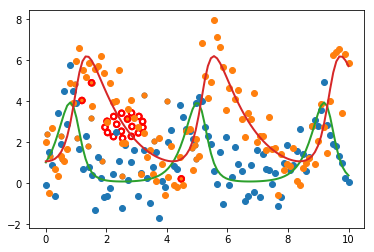

In [123]:
plt.scatter(P0[:, 0], P0[:, 1], s=25)
P = sol.x.reshape((-1,2))
plt.scatter(P[:, 0], P[:, 1], edgecolors='red', facecolors='none', s=30, linewidth=2)
plt.show()

Optimization of standard statistical models
---

When we solve standard statistical problems, an optimization procedure similar to the ones discussed here is performed. For example, consider multivariate logistic regression - typically, a Newton-like algorithm known as iteratively reweighted least squares (IRLS) is used to find the maximum likelihood estimate for the generalized linear model family. However, using one of the multivariate scalar minimization methods shown above will also work, for example, the BFGS minimization algorithm. 

The take home message is that there is nothing magic going on when Python or R fits a statistical model using a formula - all that is happening is that the objective function is set to be the negative of the log likelihood, and the minimum found using some first or second order optimization algorithm.

In [38]:
import statsmodels.api as sm
import pandas as pd

### Logistic regression as optimization

Suppose we have a binary outcome measure $Y \in {0,1}$ that is conditinal on some input variable (vector) $x \in (-\infty, +\infty)$. Let the conditioanl probability be $p(x) = P(Y=y | X=x)$. Given some data, one simple probability model is $p(x) = \beta_0 + x\cdot\beta$ - i.e. linear regression. This doesn't really work for the obvious reason that $p(x)$ must be between 0 and 1 as $x$ ranges across the real line. One simple way to fix this is to use the transformation $g(x) = \frac{p(x)}{1 - p(x)} = \beta_0 + x.\beta$. Solving for $p$, we get
$$
p(x) = \frac{1}{1 + e^{-(\beta_0 + x\cdot\beta)}}
$$
As you all know very well, this is logistic regression.

Suppose we have $n$ data points $(x_i, y_i)$ where $x_i$ is a vector of features and $y_i$ is an observed class (0 or 1). For each event, we either have "success" ($y = 1$) or "failure" ($Y = 0$), so the likelihood looks like the product of Bernoulli random variables. According to the logistic model, the probability of success is $p(x_i)$ if $y_i = 1$ and $1-p(x_i)$ if $y_i = 0$. So the likelihood is
$$
L(\beta_0, \beta) = \prod_{i=1}^n p(x_i)^y(1-p(x_i))^{1-y}
$$
and the log-likelihood is 
\begin{align}
l(\beta_0, \beta) &= \sum_{i=1}^{n} y_i \log{p(x_i)} + (1-y_i)\log{1-p(x_i)} \\
&= \sum_{i=1}^{n} \log{1-p(x_i)} + \sum_{i=1}^{n} y_i \log{\frac{p(x_i)}{1-p(x_i)}} \\
&= \sum_{i=1}^{n} -\log 1 + e^{\beta_0 + x_i\cdot\beta} + \sum_{i=1}^{n} y_i(\beta_0 + x_i\cdot\beta)
\end{align}

Using the standard 'trick', if we augment the matrix $X$ with a column of 1s, we can write $\beta_0 + x_i\cdot\beta$ as just $X\beta$.

In [41]:
df_ = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df_.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [42]:
# We will ignore the rank categorical value

cols_to_keep = ['admit', 'gre', 'gpa']
df = df_[cols_to_keep]
df.insert(1, 'dummy', 1)
df.head()

,admit,dummy,gre,gpa
0,0,1,380,3.61
1,1,1,660,3.67
2,1,1,800,4.00
3,1,1,640,3.19
4,0,1,520,2.93


### Solving as a GLM with IRLS

This is very similar to what you would do in R, only using Python's `statsmodels` package. The GLM solver uses a special variant of Newton's method known as iteratively reweighted least squares (IRLS), which will be further desribed in the lecture on multivarite and constrained optimizaiton.

In [43]:
model = sm.GLM.from_formula('admit ~ gre + gpa', 
                            data=df, family=sm.families.Binomial())
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -240.17
Date:                Wed, 21 Feb 2018   Deviance:                       480.34
Time:                        22:12:00   Pearson chi2:                     398.
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9494      1.075     -4.604      0.000      -7.057      -2.842
gre            0.0027      0.001      2.544      0.011       0.001       0.005
gpa            0.7547      0.320      2.361      0.018       0.128       1.381
==============================================================================
"""

### Solving as logistic model with bfgs

Note that you can choose any of the scipy.optimize algotihms to fit the maximum likelihood model. This knows about higher order derivatives, so will be more accurate than homebrew version.

In [44]:
model2 = sm.Logit.from_formula('admit ~ %s' % '+'.join(df.columns[2:]), data=df)
fit2 = model2.fit(method='bfgs', maxiter=100)
fit2.summary()

Optimization terminated successfully.
         Current function value: 0.600430
         Iterations: 22
         Function evaluations: 31
         Gradient evaluations: 26


C:\Users\elias\Anaconda3.1\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\elias\Anaconda3.1\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\elias\Anaconda3.1\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\elias\Anaconda3.1\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Feb 2018   Pseudo R-squ.:                 0.03927
Time:                        22:12:08   Log-Likelihood:                -240.17
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 5.456e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9494      1.075     -4.604      0.000      -7.057      -2.842
gre            0.0027      0.001      2.544      0.011       0.001       0.005
gpa            0.7547      0.320      2.361      0.018       0.128       1.381
==============================================================================
"""

### Home-brew logistic regression using a generic minimization function

This is to show that there is no magic going on - you can write the function to minimize directly from the log-likelihood equation and run a minimizer. It will be more accurate if you also provide the derivative (+/- the Hessian for second order methods), but using just the function and numerical approximations to the derivative will also work. As usual, this is for illustration so you understand what is going on - when there is a library function available, youu should probably use that instead.

In [45]:
def f(beta, y, x):
    """Minus log likelihood function for logistic regression."""
    return -((-np.log(1 + np.exp(np.dot(x, beta)))).sum() + (y*(np.dot(x, beta))).sum())

In [49]:
from scipy import optimize as opt
beta0 = np.zeros(3)
opt.minimize(f, beta0, args=(df['admit'], df.ix[:, 'dummy':]), method='BFGS', options={'gtol':1e-2})

      fun: 240.17199087255744
 hess_inv: array([[ 1.11834332e+00, -2.88171993e-04, -2.70749402e-01],
       [-2.88171993e-04,  1.10960119e-06, -1.11496433e-04],
       [-2.70749402e-01, -1.11496433e-04,  9.82751152e-02]])
      jac: array([-3.81469727e-06, -2.21252441e-03, -1.14440918e-05])
  message: 'Optimization terminated successfully.'
     nfev: 65
      nit: 8
     njev: 13
   status: 0
  success: True
        x: array([-4.94930989e+00,  2.69042396e-03,  7.54712636e-01])

### Optimization with `sklearn`

There are also many optimization routines in the `scikit-learn` package, as you already know from the previous lectures. Many machine learning problems essentially boil down to the minimization of some appropriate loss function.

### Resources

- [Scipy Optimize refernce](http://docs.scipy.org/doc/scipy/reference/optimize.html)
- [Scipy Optimize tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
- [LMFit - a modeling interface for nonlinear least squares problems](http://cars9.uchicago.edu/software/python/lmfit/index.html)
- [CVXpy- a modeling interface for convex optimization problems](https://github.com/cvxgrp/cvxpy)
- [Quasi-Newton methods](http://en.wikipedia.org/wiki/Quasi-Newton_method)
- [Convex optimization book by Boyd & Vandenberghe](http://stanford.edu/~boyd/cvxbook/)
- [Nocedal and Wright textbook](http://www.springer.com/us/book/9780387303031)
- [Paul's Online Math Notes](http://tutorial.math.lamar.edu/)
